In [1]:
import os
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
import pickle

from optimization.src.oracle import *
from optimization.src.encoding_utils import *

font = {'family' : 'arial',
        'size'   : 16}
mpl.rc('font', **font)
mpl.rc('lines', linewidth=2)
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2

### Load the optimization results

In [2]:
results = np.load('optimization/saved/examples/simple_exp1_GB1/results.npy', allow_pickle=True)
means = results.item()['means']
vars = results.item()['vars']
Xts = results.item()['Xts'].astype(int)

final_means = means[-1, :, :]
final_vars = vars[-1, :, :]

initial_encodings = Xts[0, :, :]
final_encodings = Xts[-1, :, :]

encoding2seq(final_encodings[131, :, 0])

'VTNNDYRVBRNT'

### Visualize optimization trajectories

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


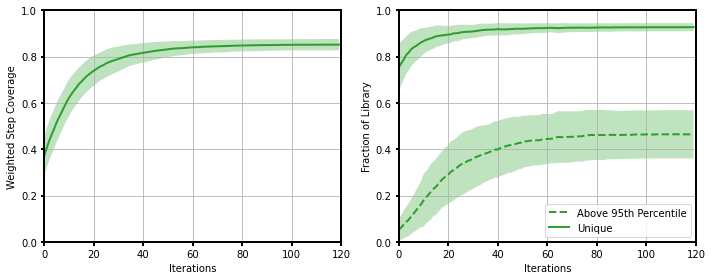

In [3]:
def trajectory_plot2(means, fig, ax1, ax2, color):
    overall_means = np.mean(means, axis = 1)
    overall_stds = np.std(means, axis = 1)
    
    iters = 120
    ax1.set_xlim(0, iters)
    ax2.set_xlim(0, iters)
    ax1.set_ylim(0, 1)
    ax2.set_ylim(0, 1)
    ax1.plot(overall_means[:,0], color=color)
    ax1.fill_between(list(range(iters)), overall_means[:,0] - overall_stds[:,0], overall_means[:,0] + overall_stds[:,0], alpha=0.3, facecolor=color)

    ax2.plot(overall_means[:,3]/384, '--', color=color)
    ax2.plot(overall_means[:,4]/384, '-', color=color)
    ax2.fill_between(list(range(iters)), (overall_means[:,4] - overall_stds[:,4])/384, (overall_means[:,4] + overall_stds[:,4])/384, alpha=0.3, facecolor=color)

    ax2.fill_between(list(range(iters)), (overall_means[:,3] - overall_stds[:,3])/384, (overall_means[:,3] + overall_stds[:,3])/384, alpha=0.3, facecolor=color)

    ax1.set_xlabel("Iterations")
    ax1.set_ylabel("Weighted Step Coverage")

    ax2.set_ylabel("Fraction of Library")
    ax2.set_xlabel("Iterations")

    plt.legend(['Above 95th Percentile', 'Unique'], loc = 'lower right')
    plt.tight_layout()

fig, (ax1, ax2) = plt.subplots(figsize=(10, 4), nrows=1, ncols=2)
ax2.grid()
ax1.grid()
#colors = ['mediumturquoise', 'teal', 'darkslategrey']
colors = ['tab:green']
for name, color in zip(['simple_exp1_GB1'], colors):
    
    results = np.load('optimization/saved/examples/' + name + '/results.npy', allow_pickle=True)
    means = results.item()['means']
    trajectory_plot2(means, fig, ax1, ax2, color)
ax1.set_xticks(np.arange(0, 140, step=20))
ax2.set_xticks(np.arange(0, 140, step=20))

### Visualize allowed nucleotides

Text(0.5, -3.0, 'Nucleotide Position')

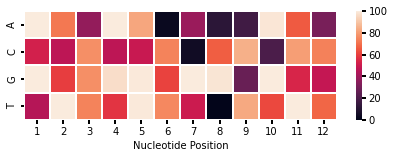

In [4]:
plt.figure(figsize = (7, 2))
sns.heatmap(data = np.sum(final_encodings, axis = 0).reshape(-1, 4).T/240*100, vmin = 0, vmax=100, yticklabels=['A', 'C', 'G', 'T'], xticklabels=np.arange(1, 13), linewidths=2)
plt.xlabel('Nucleotide Position')

### Get amino acid distributions that correspond to the optimization results

In [5]:
library_sizes, unique_indices, final_AA_encodings, unique_encodings, unique_AA_encodings = get_AA_encodings(final_encodings)

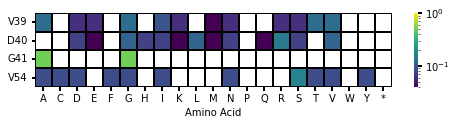

In [6]:
labels = ['V39', 'D40', 'G41', 'V54']

#Visualize an amino acid distribution
plt.figure(figsize = (8,16))
full_order = [131]

for i, index in enumerate(full_order):
        data = unique_AA_encodings[index,:,0].reshape((4,21))

        plt.subplot(10,1,i+1)
        sns.heatmap(data/1728, yticklabels=labels, xticklabels=ALL_AAS, linewidths=2, linecolor='k',cmap = 'viridis',  norm=LogNorm(vmin = 0.04, vmax = 1))
        plt.xlabel('Amino Acid')

### Analysis of MLDE Simulation Results

In [7]:
results = np.load('MLDE_lite/saved/examples/boosting_top_GB1/mlde_results.npy', allow_pickle=True)

maxes = results.item()['maxes']
means = results.item()['means']
ndcgs = results.item()['ndcgs']
top_seqs = results.item()['top_seqs']
labelled = results.item()['labelled']
unique = results.item()['unique']

maxes2 = maxes.reshape(maxes.shape[3], maxes.shape[4]).T
means2 = means.reshape(means.shape[3], means.shape[4]).T
ndcgs2 = ndcgs.reshape(ndcgs.shape[3], ndcgs.shape[4]).T
unique2 = unique.reshape(unique.shape[3], unique.shape[4]).T

Text(0, 0.5, 'Max Fitness Achieved')

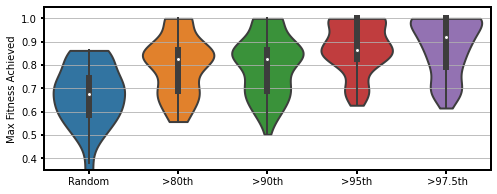

In [8]:
#MLDE violin plots
plt.figure(figsize = (8,3))
ax = sns.violinplot(data=maxes2, scale='width', cut=0)
ax.set_xticklabels(['Random', '>80th', '>90th', '>95th', ' >97.5th'])
plt.ylim([0.35, 1.05])
plt.grid(axis = 'y')
plt.ylabel('Max Fitness Achieved')